# Medidas de dispersión

Las medidas de dispesión mas utilizadas son Rango, Rango Intercuartil, Desviacion estandar.

- **Rango**
El rango es la distancia que existe entre el valor máximo y el mínimo de un conjunto de datos.

- **Rango intercuartil**
El rango intercuartil se mide en base a los cuartiles

los cuartiles son valores en el conjunto de datos que lo dividen en 4 partes iguales de distancia.

el primer cuartil es la mediana el cual es Q2

el cuartil Q3 se encuentra justo en la mitad entre la mediana(Q2 ) y el valor máximo

el cuartil Q1 se encuentra justo en la mitad entre la mediana(Q2) y el valor mínimo

la distancia entre Q1 y Q3 se conoce como el **Rango intercuartil**

![cuadrantes](./images/cuadrantes.png)

- Desviación estándar

Dada una distribucion normal


### Rango:

El Rango es el intervalo entre el valor máximo y el valor mínimo.

### Cuartiles
Los cuartiles separan los datos en 4 partes iguales

Los cuartiles son valores que dividen una muestra de datos en cuatro partes iguales

- 1er cuartil (Q1): 25% de los datos es menor que o igual a este valor.
- 2do cuartil (Q2): La mediana. 50% de los datos es menor que o igual a este valor.
- 3er cuartil (Q3): 75% de los datos es menor que o igual a este valor.
- Rango intercuartil: La distancia entre el primer 1er cuartil y el 3er cuartil (Q3-Q1); de esta manera, abarca el 50% central de los datos.

### Diagrama de caja o box plot

representa gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, el diagrama de caja muestra a simple vista la mediana y los cuartiles de los datos. También puede representar los valores atípicos de estos.

### Dataset

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

## Desviación estándar

Media

$$
\mu = \frac {1}{n} \sum \limits_{i=1}^n a_i
$$

Formula

$$
\sigma={\sqrt {\frac {\sum(x_{i}-{\mu})^{2}}{N}}}
$$

Un error común es comparar la desviación estándar de dos variables que tienen escalas diferentes, en este ejemplo usaremos el edad y altura

edad cumplida
media = 24, desviación estándar = 2.5

altura en centimentros
media = 175, desviación estándar = 8

Como vemos la desviación estándar de altura es mayor dado a su escala.

Lo correcto sería usar el coeficiente de variabilidad que es simplemente dividir la desviación estandar entre la media.

edad
2.5 / 24 = 0.1042.

altura
8 / 175 = 0.0457

Ahora ambas variables la podemos compara y concluimos que edad tiene una mayor variabilidad

Cuadrantes en una distribucion normal

![cuadrantes](./images/cuadrantes.png)

Desviacion estandar

![desviacion estandar](./images/desviacion_estandar.webp)

Metodo de deteccion de Outliers utilizando en el Rango Inter Cuartil (IQR) en **una distribucion normal**

min = Q1 - 1.5*IQR

max = Q3 + 1.5*IQR

Si la distribucion **no es normal**

min = Q1 - 1.5 * f(IQR)

max = Q3 + 1.5 * f(IQR)


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cars.csv')

In [ ]:
# Desviación estandar
df['price_usd'].std()

6428.1520182029035

In [ ]:
# Rango = valor max - valor min
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [ ]:
# Quartiles
median = df['price_usd'].median()
print(median)
Q1 = df['price_usd'].quantile(q=0.25)
print(Q1)
Q3 = df['price_usd'].quantile(q=0.75)
print(Q3)
min_val = df['price_usd'].quantile(q=0)
print(min_val)

max_val = df['price_usd'].quantile(q=1.0)
print(max_val)

4800.0
2100.0
8990.0
1.0
50000.0


In [ ]:
iqr = Q3 - Q1
iqr

6890.0

### Límites para detección de outliers (datos simetricamente distribuidos)

Datos entre $$Q_1 -1.5 \times \text{IQR}$$ y $$Q_3 + 1.5 \times \text{IQR}$$

In [ ]:
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr
print('rango para detección de outliers: {}, {}'.format(minlimit, maxlimit))

rango para detección de outliers: -8235.0, 19325.0


<AxesSubplot:xlabel='price_usd', ylabel='Count'>

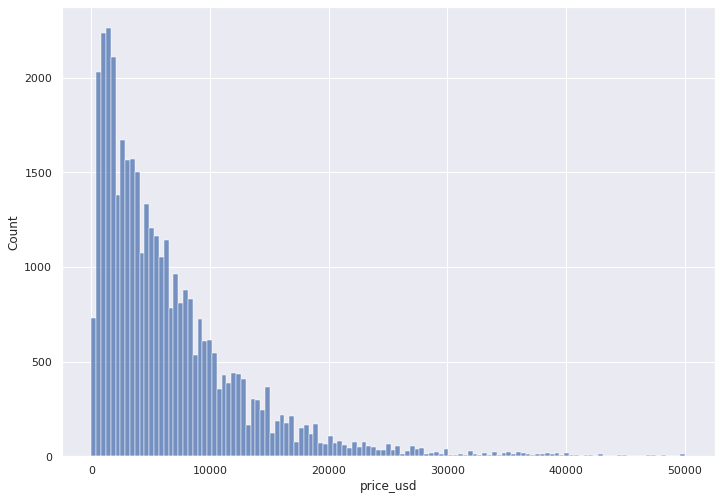

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df['price_usd'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price_usd'>

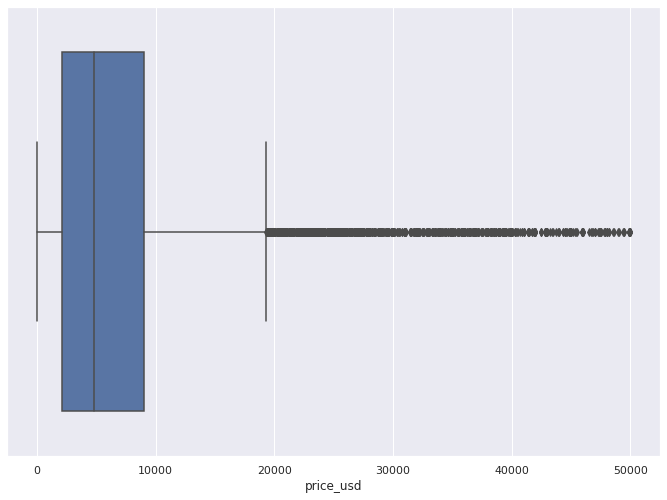

In [ ]:
sns.boxplot(df['price_usd'])

como podemos ver en la grafica la distribucion de datos esta sesgada

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

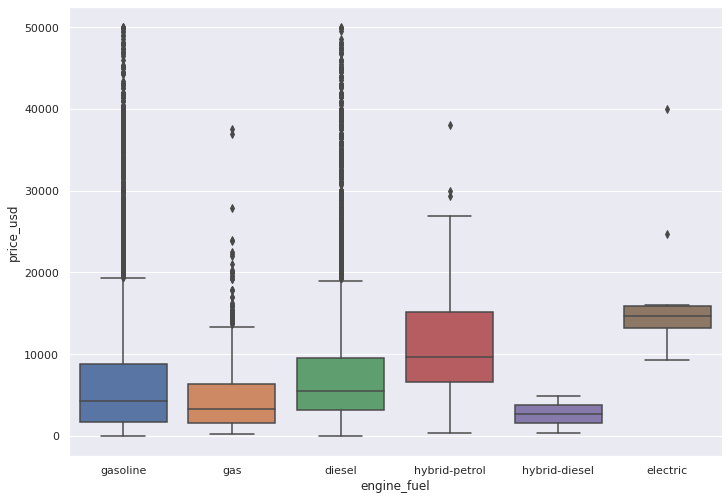

In [ ]:
sns.boxplot(x = 'engine_fuel', y= 'price_usd', data=df)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, '')]

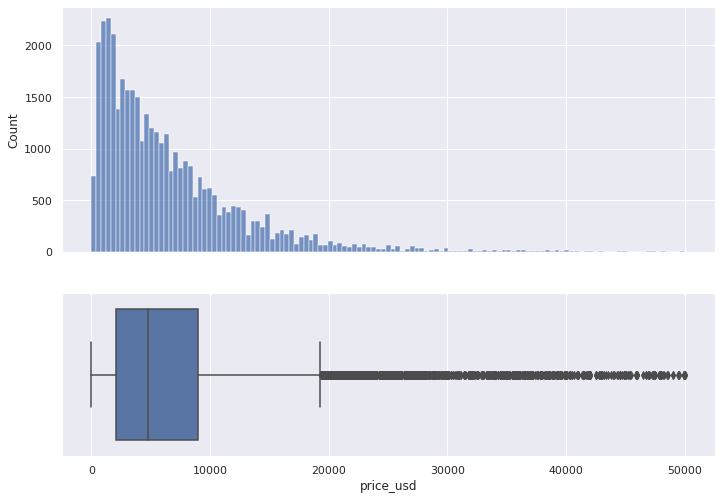

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df['price_usd'], ax=ax_hist)
sns.boxplot(df['price_usd'], ax=ax_box)
ax_hist.set(xlabel='')

Es posible calcular varios box-plot separando por una cierta variable categórica:

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

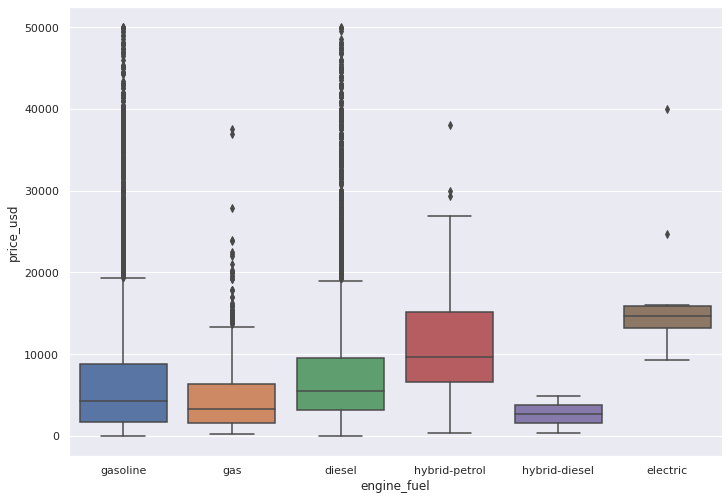

In [ ]:
sns.boxplot(x = 'engine_fuel', y = 'price_usd', data = df)

## Asimetría en distribuciones
Como vimos en la clase, el hecho de que nuestra distribución tenga una tendencia a la derecha o a izquierda nos representa un problema, ya que no a acorde con una distribución y eso puede afectar a nuestros análisis si no tomamos en cuenta ese sesgo. No siempre hay que confiar en nuestra intuición o lo que vemos a simple vista, hay métodos como:

- Primer coeficiente de asimetría de Pearson (asimetría de modo)
- Segundo coeficiente de asimetría de Pearson (asimetría mediana)
- Coeficiente de Groeneveld y Meeden
- Coeficiente de Fisher

Por mencionar algunos.
.

Y por último, no hay que olvidar la curtosis:
Una curtosis grande implica una mayor concentración de valores de la variable tanto muy cerca de la media de la distribución (pico) como muy lejos de ella (colas), al tiempo que existe una relativamente menor frecuencia de valores intermedios. Esto explica una forma de la distribución de frecuencias/probabilidad con colas más gruesas, con un centro más apuntado y una menor proporción de valores intermedios entre el pico y colas.
Una mayor curtosis no implica una mayor varianza, ni viceversa.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc504059-8ad6-4235-92fa-88fa0fec1687' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>